In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
# Generates an array of values from 0 to 50 and 501 numbers
x = np.linspace(0,50,501)

In [6]:
y=np.sin(x)


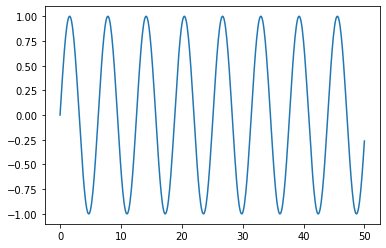

In [7]:
plt.plot(x,y)

In [8]:
df = pd.DataFrame(data=y ,index=x ,columns=['Sine'])

In [9]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [10]:
#We want the last few data-points to be the test set

In [11]:
test_point = np.round(len(df)*0.1)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(df) -test_point)

In [14]:
test_index

451

In [15]:
train = df.iloc[:451]

In [16]:
test = df.iloc[451:]

In [17]:
# As we are feeding the input pack into the model ,we also need to scale the index as its a much bigger value compared to the data..

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scalar = MinMaxScaler()

In [20]:
scaled_train = scalar.fit_transform(train)

In [21]:
scaled_test = scalar.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
 # help(TimeseriesGenerator)

In [24]:
length = 25  # In terms of timesteps
batch_size = 1

generator = TimeseriesGenerator(scaled_train ,scaled_train,
                               length =length,
                               batch_size=batch_size)

In [25]:
len(scaled_train)

451

In [26]:
len(generator)

426

In [30]:
generator[0][1]

array([[0.79923759]])

In [31]:
X , y = generator[0]

In [32]:
 X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [33]:
y

array([[0.79923759]])

In [34]:
 # scaled_train

In [35]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense , LSTM ,SimpleRNN

In [37]:
n_features = 1  # Number of features, only 1 value to predict (y)

In [38]:
model = Sequential()

model.add(SimpleRNN(50 , input_shape = (length ,n_features)))  # Layers is similar to the number of neurons..

In [45]:
model.add(Dense(1))

model.compile(optimizer='adam' , loss='mse')  # Mean square error loss type for continuous values..

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(generator ,epochs=5)

Epoch 1/5
426/426 [==============================] - 2s 4ms/step - loss: 0.0056
Epoch 2/5
426/426 [==============================] - 2s 4ms/step - loss: 5.9356e-05
Epoch 3/5
426/426 [==============================] - 1s 3ms/step - loss: 1.7460e-05
Epoch 4/5
426/426 [==============================] - 1s 3ms/step - loss: 1.5390e-04
Epoch 5/5
426/426 [==============================] - 1s 3ms/step - loss: 3.4428e-04


In [48]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

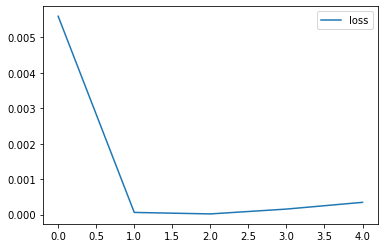

In [49]:
losses.plot()

In [41]:
first_eval_batch = scaled_train[-length:]   # We take the last 50 points from the train set and use it to predict the first point in the test set.

In [43]:
first_eval_batch = first_eval_batch.reshape(1,length ,n_features)

In [52]:
model.predict(first_eval_batch)

array([[0.9537614]], dtype=float32)

In [53]:
scaled_test[0]  

array([0.94955134])

In [45]:
# Hence we drop the first row and expand the series by appending a new predicted row value..Also we are basically predicting off the last values and 
# forecasting towards the future..Hence we drop the first row to make place for the predicted value to be appended and the generaotr takes in
# the new set of 25 values and predicts another 1 value which must be appended via a 'for' loop..

In [95]:
 ''' predicted_value = [[[99]]]
  np.append(current_batch[:,1:,:] ,[[[99]]] ,axis=1)
  '''

' predicted_value = [[[99]]]\n np.append(current_batch[:,1:,:] ,[[[99]]] ,axis=1)\n '

In [65]:
# Now we will be creating a new batch size to feed into the generator object and the generator object only accepts 25 characters or numbers..
test_predictions =[]

first_eval_batch = scaled_train[-length:]
current_batch =first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
#     Play close attention to the dimensions of the input
    current_batch = np.append(current_batch[:,1:,:] ,[[current_pred]] ,axis=1)

In [66]:
test_predictions

[array([0.9537614], dtype=float32),
 array([0.97536975], dtype=float32),
 array([0.99249226], dtype=float32),
 array([1.0044785], dtype=float32),
 array([1.0118598], dtype=float32),
 array([1.0149361], dtype=float32),
 array([1.0128157], dtype=float32),
 array([1.0058943], dtype=float32),
 array([0.9942115], dtype=float32),
 array([0.9786832], dtype=float32),
 array([0.9589411], dtype=float32),
 array([0.9354183], dtype=float32),
 array([0.90814644], dtype=float32),
 array([0.8778885], dtype=float32),
 array([0.84457046], dtype=float32),
 array([0.8083654], dtype=float32),
 array([0.7696914], dtype=float32),
 array([0.7287083], dtype=float32),
 array([0.6859068], dtype=float32),
 array([0.6414827], dtype=float32),
 array([0.5956972], dtype=float32),
 array([0.5489548], dtype=float32),
 array([0.5017148], dtype=float32),
 array([0.45446178], dtype=float32),
 array([0.40753144], dtype=float32),
 array([0.3613105], dtype=float32),
 array([0.31642976], dtype=float32),
 array([0.27334887], 

In [67]:
 # scaled_test

In [68]:
true_predictions = scalar.inverse_transform(test_predictions)

In [69]:
test['Predictions'] = true_predictions

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

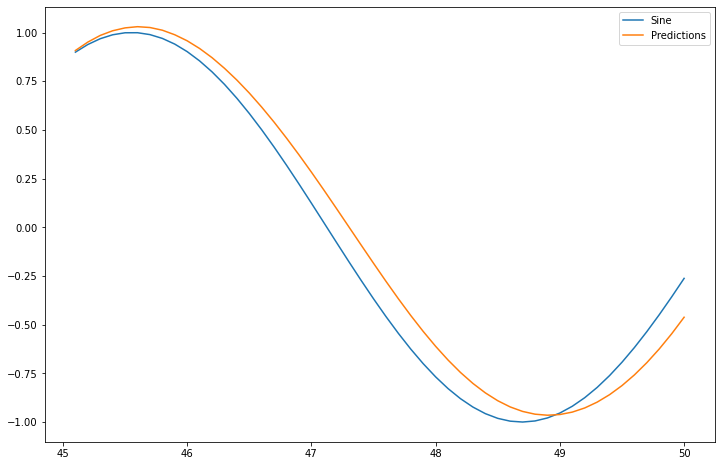

In [75]:
 test.plot(figsize=(12,8))

In [76]:
# We need to create two generators ,one for our training data and the other for our validation data..

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
early_stop = EarlyStopping(monitor='val_loss' , patience=2)

In [79]:
# If it gets noisy ,  we use patience to counteract that..

In [83]:
# validation_generator = TimeseriesGenerator(scaled_test, scaled_test ,length=length ,batch_size=1)  # The scaled_test set must be greater than the length you pass in..I have chosen 25 points as the length and the scaled_test data is 50 points..We need to have the future y point to predict it to , so the length of the test set has to be equal 
# to or greater than the length we specified..

In [85]:
model = Sequential()

model.add(LSTM(50 , input_shape = (length ,n_features)))


model.add(Dense(1))

model.compile(optimizer='adam' , loss='mse')

In [86]:
model.fit(generator , epochs=20 ,validation_data=validation_generator,
         callbacks=[early_stop])

Epoch 1/20
426/426 [==============================] - 3s 8ms/step - loss: 0.0144 - val_loss: 1.1109e-04
Epoch 2/20
426/426 [==============================] - 3s 7ms/step - loss: 1.5201e-04 - val_loss: 2.7007e-04
Epoch 3/20
426/426 [==============================] - 3s 6ms/step - loss: 1.4641e-04 - val_loss: 3.5759e-05
Epoch 4/20
426/426 [==============================] - 3s 7ms/step - loss: 6.5359e-04 - val_loss: 1.3641e-05
Epoch 5/20
426/426 [==============================] - 3s 7ms/step - loss: 3.8014e-05 - val_loss: 1.9691e-05
Epoch 6/20
426/426 [==============================] - 3s 7ms/step - loss: 4.8141e-05 - val_loss: 1.7806e-05


In [87]:
test_predictions =[]

first_eval_batch = scaled_train[-length:]
current_batch =first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch =np.append(current_batch[:,1:,:] ,[[current_pred]] ,axis=1)

In [90]:
true_predictions = scalar.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

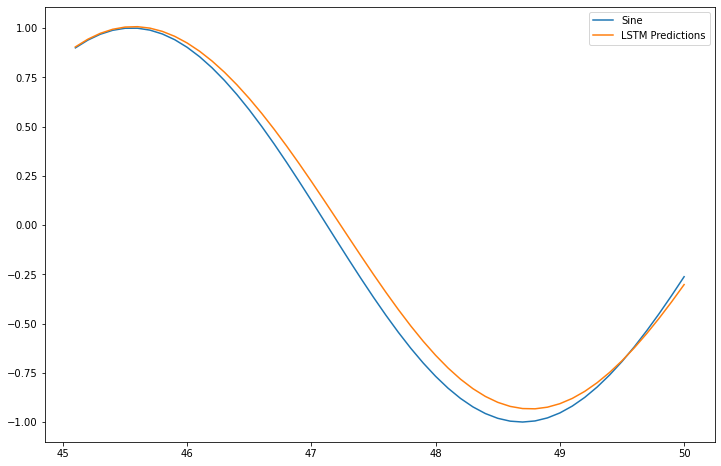

In [99]:
test[['Sine' ,'LSTM Predictions']].plot(figsize=(12,8))

In [100]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [102]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=50,batch_size=batch_size)

In [103]:
model = Sequential()

model.add(LSTM(50 , input_shape = (50 ,n_features)))


model.add(Dense(1))

model.compile(optimizer='adam' , loss='mse')

In [104]:
model.fit(generator , epochs=6)

Epoch 1/6
451/451 [==============================] - 6s 13ms/step - loss: 0.0044: 0s - l
Epoch 2/6
451/451 [==============================] - 5s 11ms/step - loss: 1.0443e-04
Epoch 3/6
451/451 [==============================] - 5s 11ms/step - loss: 3.1882e-04
Epoch 4/6
451/451 [==============================] - 5s 11ms/step - loss: 1.1675e-04
Epoch 5/6
451/451 [==============================] - 5s 11ms/step - loss: 1.4583e-04
Epoch 6/6
451/451 [==============================] - 5s 11ms/step - loss: 1.6370e-04


In [107]:
forecast =[]

first_eval_batch = scaled_train[-length:]
current_batch =first_eval_batch.reshape(1,25,n_features)

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch =np.append(current_batch[:,1:,:] ,[[current_pred]] ,axis=1)

In [108]:
forecast = scalar.inverse_transform(forecast)

In [109]:
forecast

array([[ 0.8990579 ],
       [ 0.93570207],
       [ 0.96203221],
       [ 0.9777664 ],
       [ 0.98276766],
       [ 0.97702897],
       [ 0.96065678],
       [ 0.93385624],
       [ 0.89690929],
       [ 0.85016091],
       [ 0.7940046 ],
       [ 0.72887144],
       [ 0.65522596],
       [ 0.57356432],
       [ 0.48441758],
       [ 0.38835963],
       [ 0.28601868],
       [ 0.17809091],
       [ 0.06535881],
       [-0.05129495],
       [-0.17087163],
       [-0.29224795],
       [-0.41417447],
       [-0.535284  ],
       [-0.65411304]])

In [111]:
forecast_index = np.arange(50.1 ,52.6 ,0.1)

In [112]:
len(forecast_index)

25

In [113]:
len(forecast)

25

In [117]:
# df['Sine'].plot()
# plt.plot(forecast_index ,forecast)

In [158]:
forecast_df = pd.DataFrame(index = forecast_index,data = forecast ,columns=['Sine'])


In [165]:
joint_df = pd.concat((df , forecast_df), axis=0)

<AxesSubplot:>

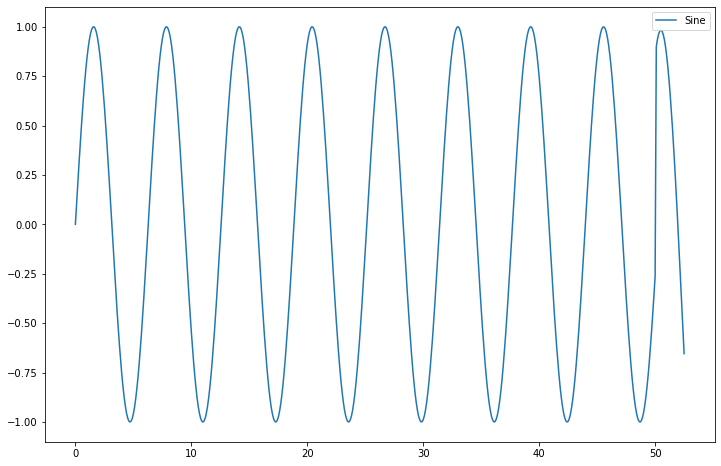

In [166]:
joint_df.plot(figsize=(12,8))